In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.cross_decomposition import CCA

In [5]:
# Step 1: Simulate or Load Data
# Let's assume `connectivity_features` is an (n_samples, n_connectivity_features) matrix
# and `HAMD_17_responses` is an (n_samples, 17) matrix with each column being a depressive symptom.

# Replace this with actual data loading
n_samples = 100  # number of subjects
n_connectivity_features = 50  # number of connectivity features
n_symptoms = 1  # number of symptoms: GAD + Sleep + biological age

# Simulated data (replace with your actual data)
np.random.seed(42)
connectivity_features = np.random.rand(n_samples, n_connectivity_features)
HAMD_17_responses = np.random.randint(1, 5, size=(n_samples, n_symptoms))

# Step 2: Spearman's rank correlation for each feature against each symptom
# Store p-values and correlation coefficients
p_values = np.zeros((n_connectivity_features, n_symptoms))
correlation_coeffs = np.zeros((n_connectivity_features, n_symptoms))

for i in range(n_connectivity_features):
    for j in range(n_symptoms):
        rho, p_val = spearmanr(connectivity_features[:, i], HAMD_17_responses[:, j])
        correlation_coeffs[i, j] = rho
        p_values[i, j] = p_val

# Step 3: Select connectivity features with significant correlations (p < 0.005)
# Apply the significance threshold (you can also apply FDR correction if needed)
threshold = 0.005
significant_features = np.where(p_values < threshold)[0]
filtered_connectivity_features = connectivity_features[:, significant_features]

# Step 4: Apply(CCA)
# Define the CCA model with the number of components (can be less than min(n_connectivity_features, n_symptoms))
n_components = min(len(significant_features), n_symptoms)
cca = CCA(n_components=n_components)

# Fit the CCA model
cca.fit(filtered_connectivity_features, HAMD_17_responses)

# Transform the features and symptoms into their canonical representations
connectivity_canonical, symptoms_canonical = cca.transform(filtered_connectivity_features, HAMD_17_responses)

# Step 5: Output the low-dimensional representations
print("Canonical representations of connectivity features:")
print(connectivity_canonical)
print("\nCanonical representations of symptoms:")
print(symptoms_canonical)

Canonical representations of connectivity features:
[[-1.14763268]
 [-0.96336986]
 [ 1.20644517]
 [-1.5300426 ]
 [ 0.18658184]
 [ 0.93893345]
 [ 0.64174032]
 [-1.52495858]
 [ 0.87516451]
 [ 1.43602774]
 [-0.39654988]
 [ 0.8566046 ]
 [-0.93028434]
 [ 1.20854265]
 [-1.01776529]
 [ 1.05199833]
 [-1.56724191]
 [-0.7392588 ]
 [-0.06506018]
 [ 1.33319879]
 [-0.65648206]
 [-0.85480665]
 [ 1.39176082]
 [ 1.47120944]
 [-1.11165235]
 [ 1.0945315 ]
 [-1.08524655]
 [-1.01856216]
 [-0.00344321]
 [ 0.71595745]
 [ 1.32575099]
 [-1.05889445]
 [-1.39452706]
 [ 1.15007599]
 [-1.20397679]
 [ 0.86084709]
 [-1.20397219]
 [-0.91733456]
 [-1.57164068]
 [ 1.00608884]
 [ 0.16125373]
 [ 0.03436358]
 [-0.00975324]
 [-1.36497247]
 [ 0.10067567]
 [-0.38528515]
 [ 0.63998773]
 [ 1.04936008]
 [-1.50899626]
 [ 1.41782611]
 [-1.16337242]
 [ 1.23762048]
 [ 1.19331769]
 [-0.35224338]
 [ 0.85519016]
 [-0.72694033]
 [-0.87014888]
 [ 1.36315154]
 [ 0.63559658]
 [-1.07438571]
 [-0.23514278]
 [ 0.31632356]
 [-0.81139633]
 [-

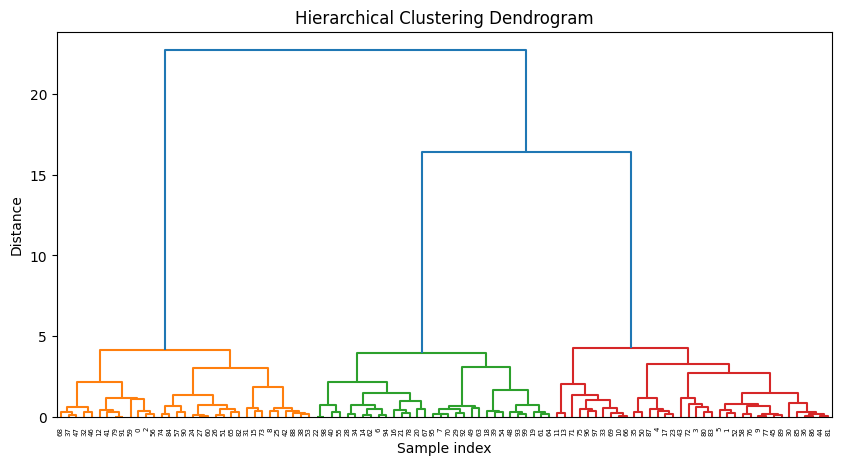

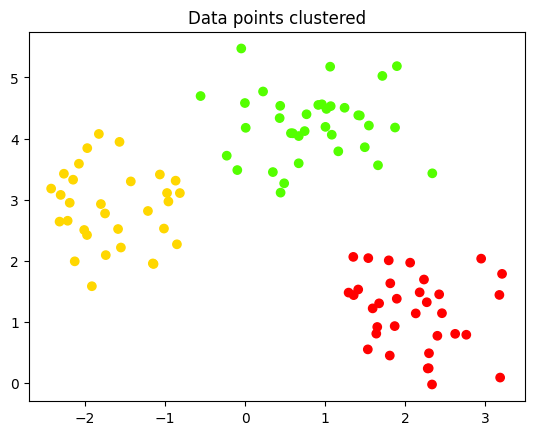

In [3]:
# Generate synthetic data (for demonstration)
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Step 1: Perform hierarchical clustering using linkage
Z = linkage(X, method='ward')  # 'ward' minimizes the variance between clusters

# Step 2: Plot the dendrogram to visualize the hierarchy
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Step 3: Cutting the dendrogram to form clusters
# Choose a threshold distance at which to cut the dendrogram (you can adjust this value)
max_d = 7  # Adjust based on dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

# Step 4: Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism')  # Plot points with cluster coloring
plt.title('Data points clustered')
plt.show()